Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing data:
 Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64
Data types after conversion:
 Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object
Cleaned dataset saved to: /content/drive/MyDrive/market_analysis_and_business_insights_project/data/cleaned_dataset.csv


<ipython-input-8-aec3423130b8>:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Postal Code'].fillna(99999, inplace=True)


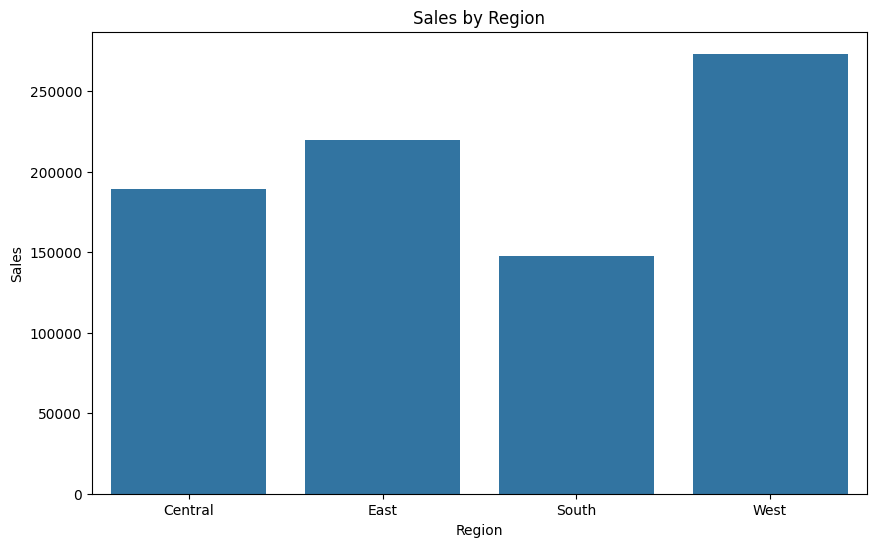

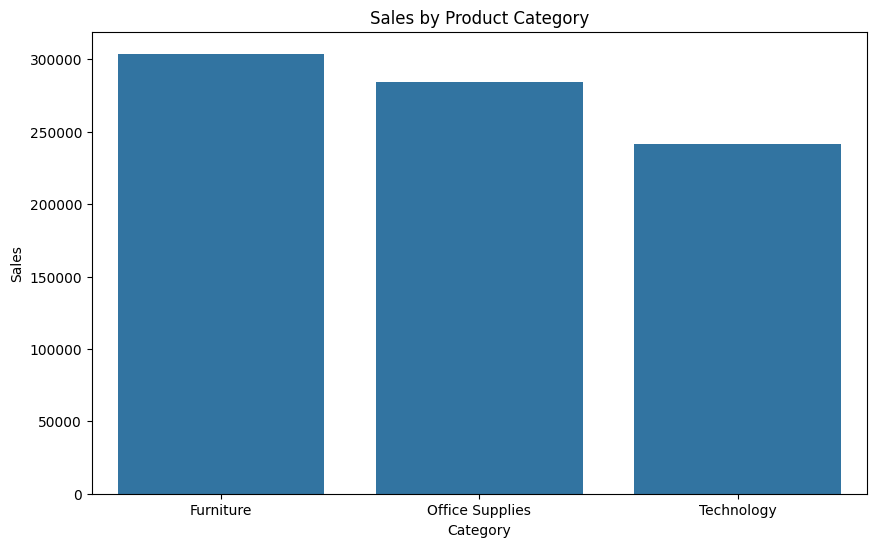

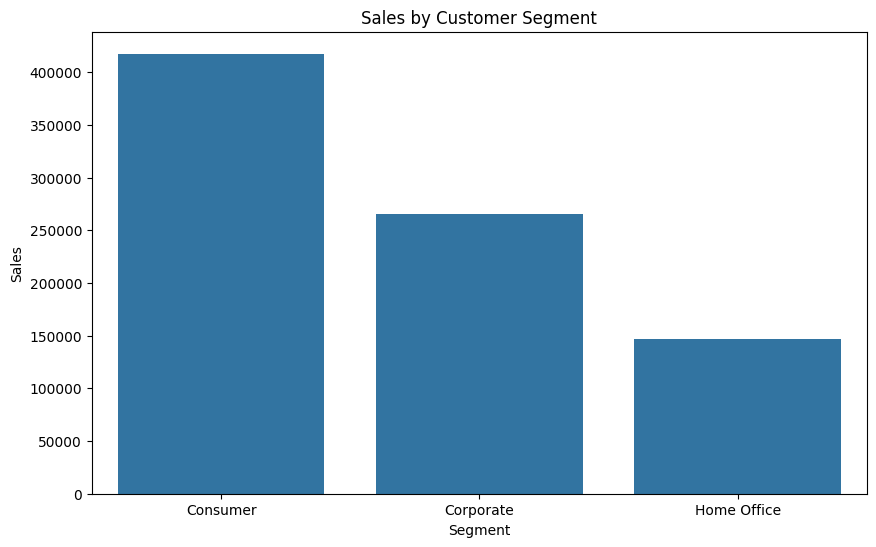

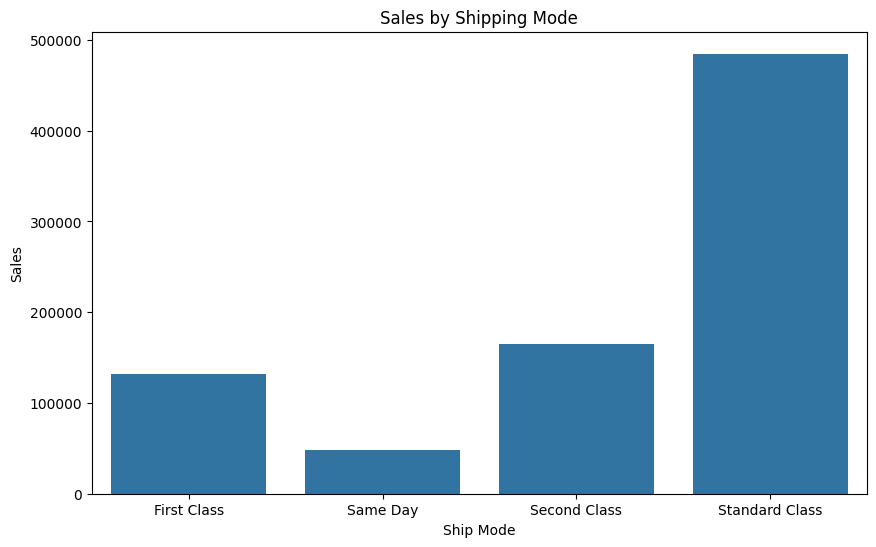

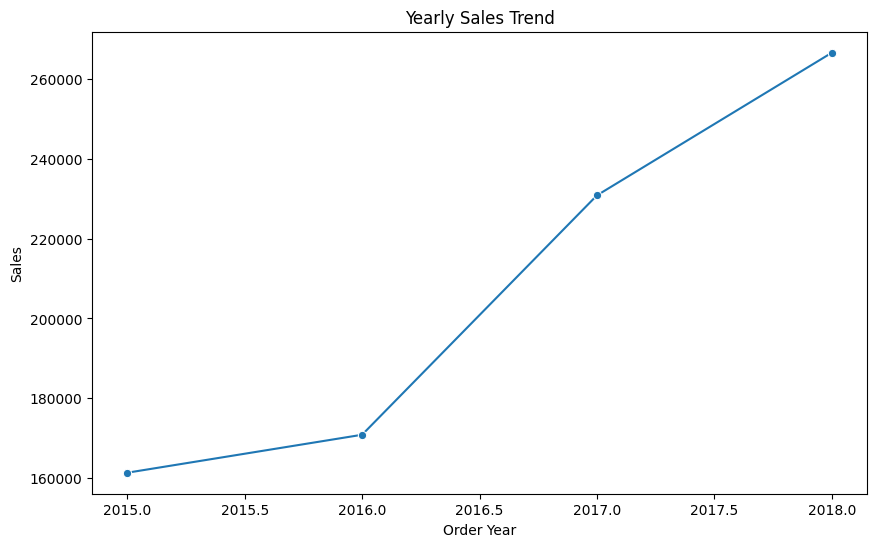

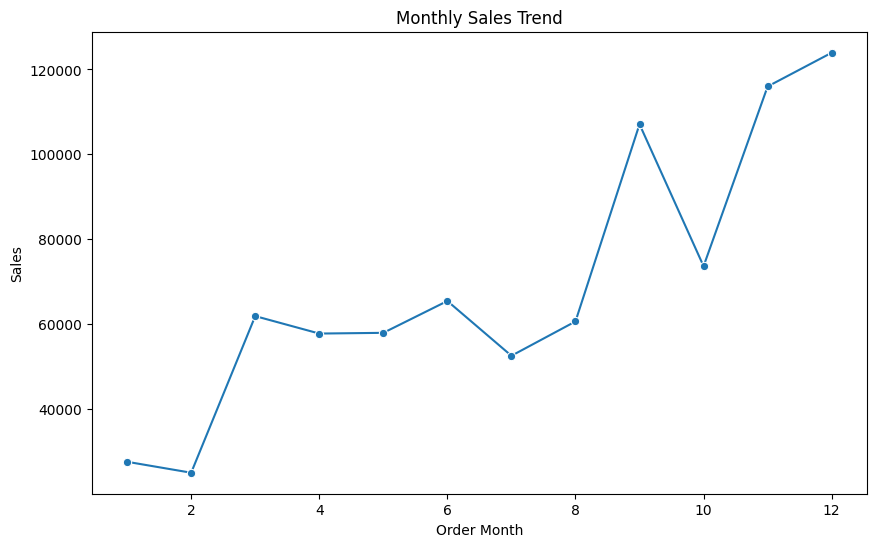

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8f4jtq0/76_wx2ou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8f4jtq0/tfooli_x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54434', 'data', 'file=/tmp/tmpa8f4jtq0/76_wx2ou.json', 'init=/tmp/tmpa8f4jtq0/tfooli_x.json', 'output', 'file=/tmp/tmpa8f4jtq0/prophet_modelp9mw60_7/prophet_model-20241013220321.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

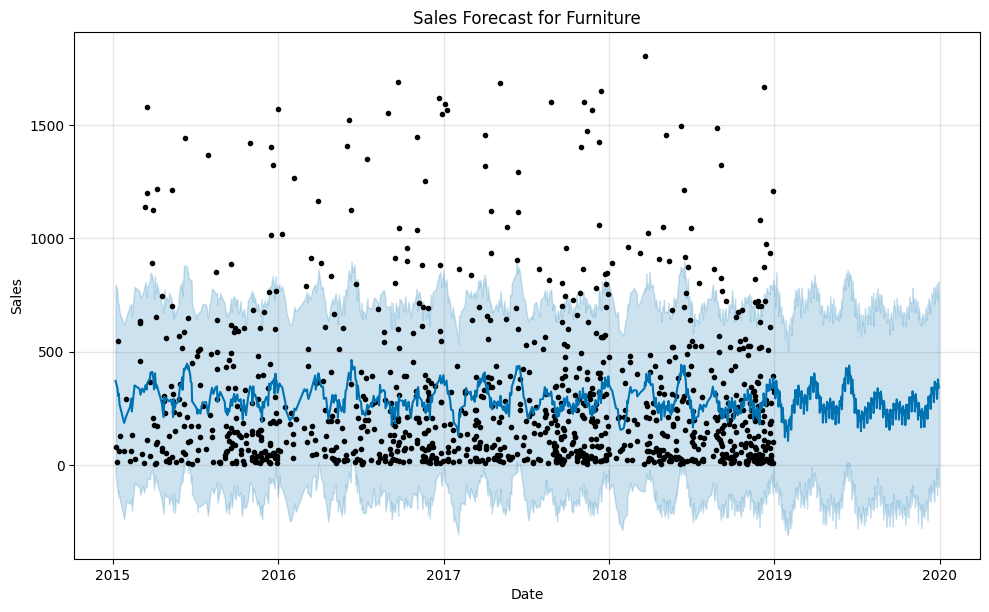

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8f4jtq0/_sii77t4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8f4jtq0/4zn6cmu2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=10779', 'data', 'file=/tmp/tmpa8f4jtq0/_sii77t4.json', 'init=/tmp/tmpa8f4jtq0/4zn6cmu2.json', 'output', 'file=/tmp/tmpa8f4jtq0/prophet_modely8usj2gk/prophet_model-20241013220323.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

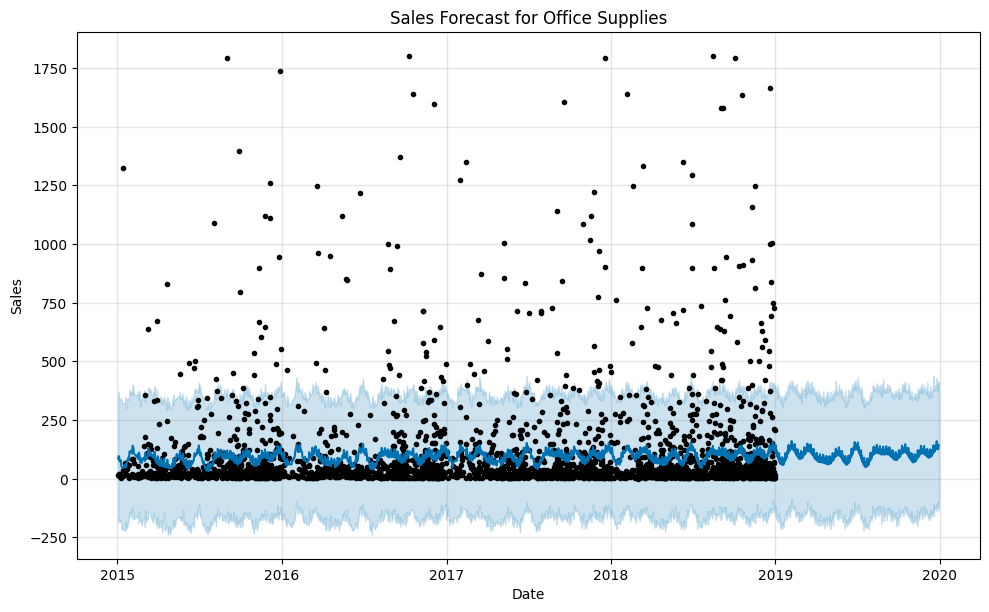

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8f4jtq0/_in2vyiw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa8f4jtq0/txg79p03.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26200', 'data', 'file=/tmp/tmpa8f4jtq0/_in2vyiw.json', 'init=/tmp/tmpa8f4jtq0/txg79p03.json', 'output', 'file=/tmp/tmpa8f4jtq0/prophet_model7hc80p5x/prophet_model-20241013220324.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:03:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:03:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

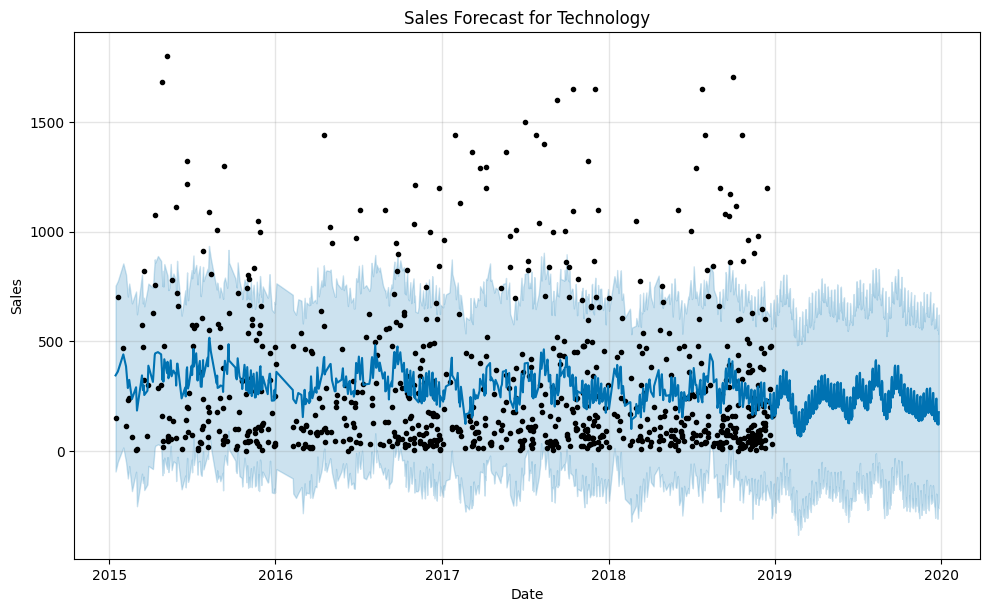

  Customer ID  Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Score
0    AA-10315     2298          4  1078.408       2       1       4       214
1    AA-10375     2133          9   718.000       5       5       3       553
2    AA-10480     2373          4    76.502       1       1       1       111
3    AA-10645     2169          6  1064.158       3       3       3       333
4    AB-10015     2529          3   283.316       1       1       1       111


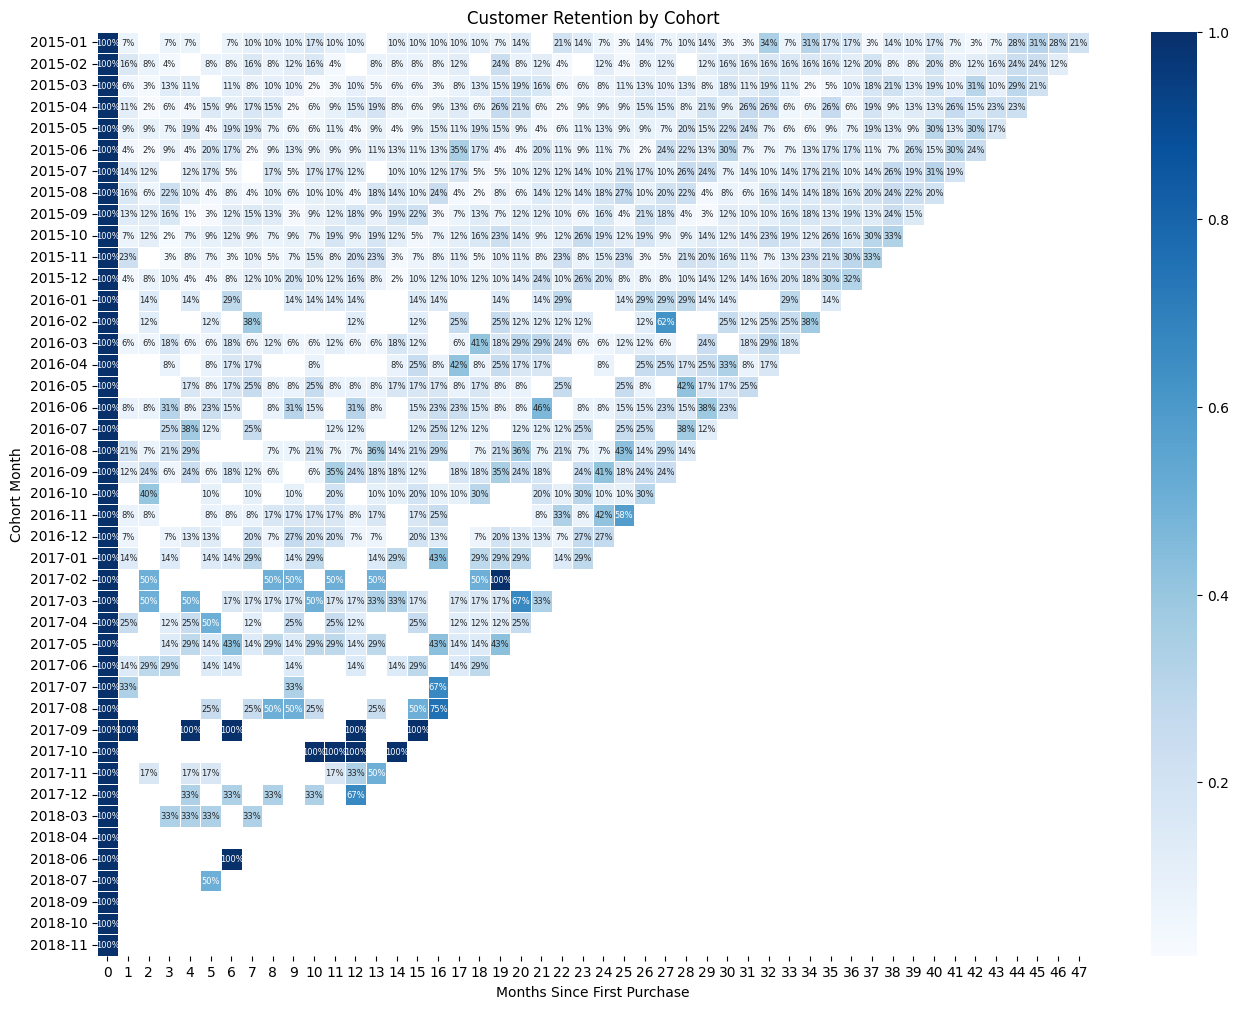

In [8]:
# Step 1: Install Necessary Libraries
!pip install prophet

# Step 2: Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
import os

# Step 3: Mount Google Drive to Access Files
from google.colab import drive
drive.mount('/content/drive')

# Step 4: Define Paths for Data and Output
data_path = '/content/drive/MyDrive/market_analysis_and_business_insights_project/data/train.csv'
output_path = '/content/drive/MyDrive/market_analysis_and_business_insights_project/data/cleaned_dataset.csv'
plot_path = '/content/drive/MyDrive/market_analysis_and_business_insights_project/plot/'

# Step 5: Ensure directories exist
if not os.path.exists(plot_path):
    os.makedirs(plot_path)

# Step 6: Ensure the dataset exists
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Dataset not found. Please check the file path: {data_path}")

# Step 7: Load Dataset
dataset = pd.read_csv(data_path)

# Step 8: Check for any missing values in the dataset
missing_data = dataset.isnull().sum()
print("Missing data:\n", missing_data)

# Step 9: Fill the missing postal codes with a default value of 99999
dataset['Postal Code'].fillna(99999, inplace=True)

# Step 10: Remove duplicates based on 'Order ID' to ensure data consistency
dataset.drop_duplicates(subset='Order ID', inplace=True)

# Step 11: Convert 'Order Date' and 'Ship Date' to datetime format
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], dayfirst=True)
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], dayfirst=True)

# Step 12: Check if the conversion was successful
print("Data types after conversion:\n", dataset[['Order Date', 'Ship Date']].dtypes)

# Step 13: Remove outliers using Z-Score (filter data within -3 to 3 Z-scores)
from scipy import stats
dataset['Z-Score Sales'] = stats.zscore(dataset['Sales'])
dataset = dataset[dataset['Z-Score Sales'].abs() <= 3]
dataset.drop(columns=['Z-Score Sales'], inplace=True)

# Step 14: Save the cleaned dataset to a new file
dataset.to_csv(output_path, index=False)
print(f"Cleaned dataset saved to: {output_path}")

# Step 15: Perform Exploratory Data Analysis (EDA)

# Sales by region
region_sales = dataset.groupby('Region')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Sales', data=region_sales)
plt.title('Sales by Region')
plt.savefig(plot_path + 'sales_by_region.png')  # Save the plot
plt.show()

# Sales by product category
category_sales = dataset.groupby('Category')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sales', data=category_sales)
plt.title('Sales by Product Category')
plt.savefig(plot_path + 'sales_by_category.png')  # Save the plot
plt.show()

# Sales by customer segment
segment_sales = dataset.groupby('Segment')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales)
plt.title('Sales by Customer Segment')
plt.savefig(plot_path + 'sales_by_segment.png')  # Save the plot
plt.show()

# Sales by shipping mode
shipmode_sales = dataset.groupby('Ship Mode')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Ship Mode', y='Sales', data=shipmode_sales)
plt.title('Sales by Shipping Mode')
plt.savefig(plot_path + 'sales_by_shipmode.png')  # Save the plot
plt.show()

# Step 16: Extract year and month from 'Order Date' for time-based analysis
dataset['Order Year'] = dataset['Order Date'].dt.year
dataset['Order Month'] = dataset['Order Date'].dt.month

# Yearly sales trend
yearly_sales = dataset.groupby('Order Year')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Year', y='Sales', data=yearly_sales, marker='o')
plt.title('Yearly Sales Trend')
plt.savefig(plot_path + 'yearly_sales_trend.png')  # Save the plot
plt.show()

# Monthly sales trend
monthly_sales = dataset.groupby('Order Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Order Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.savefig(plot_path + 'monthly_sales_trend.png')  # Save the plot
plt.show()

# Step 17: Perform Time-Series Forecasting using Prophet for each product category
categories = dataset['Category'].unique()

# Loop through each category and forecast sales using Prophet
for category in categories:
    category_data = dataset[dataset['Category'] == category][['Order Date', 'Sales']].rename(columns={'Order Date': 'ds', 'Sales': 'y'})

    model = Prophet(yearly_seasonality=True)
    model.fit(category_data)

    future_dates = model.make_future_dataframe(periods=365)
    forecast = model.predict(future_dates)

    # Plot the forecast for each category
    plt.figure(figsize=(10, 6))
    model.plot(forecast)
    plt.title(f'Sales Forecast for {category}')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.savefig(plot_path + f'sales_forecast_{category}.png')  # Save the plot
    plt.show()

# Step 18: Perform RFM Analysis (Recency, Frequency, and Monetary Value)
rfm_table = dataset.groupby('Customer ID').agg({
    'Order Date': lambda x: (pd.Timestamp('today') - x.max()).days,
    'Order ID': 'count',
    'Sales': 'sum'
}).reset_index()
rfm_table.columns = ['Customer ID', 'Recency', 'Frequency', 'Monetary']

# RFM score calculation (on a scale of 1-5)
rfm_table['R_Score'] = pd.qcut(rfm_table['Recency'], 5, labels=[5, 4, 3, 2, 1])
rfm_table['F_Score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
rfm_table['M_Score'] = pd.qcut(rfm_table['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Combine RFM scores into one column
rfm_table['RFM_Score'] = rfm_table['R_Score'].astype(str) + rfm_table['F_Score'].astype(str) + rfm_table['M_Score'].astype(str)
print(rfm_table.head())

# Step 19: Perform Cohort Analysis to analyze customer retention
dataset['CohortMonth'] = dataset.groupby('Customer ID')['Order Date'].transform('min').dt.to_period('M')
dataset['OrderMonth'] = dataset['Order Date'].dt.to_period('M')
dataset['CohortIndex'] = (dataset['OrderMonth'] - dataset['CohortMonth']).apply(lambda x: x.n)

cohort_data = dataset.pivot_table(index='CohortMonth', columns='CohortIndex', values='Customer ID', aggfunc=pd.Series.nunique)
cohort_size = cohort_data.iloc[:, 0]
retention_rate = cohort_data.divide(cohort_size, axis=0)

# Plot retention rate using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(retention_rate, annot=True, fmt='.0%', cmap='Blues', annot_kws={"size": 6}, linewidths=.5)
plt.title('Customer Retention by Cohort')
plt.ylabel('Cohort Month')
plt.xlabel('Months Since First Purchase')
plt.savefig(plot_path + 'customer_retention_cohort.png')  # Save the heatmap
plt.show()
